# Presentera PISA resultat
## 0. Uppvärmning 
### a) Läs data 
- Från Excel filen "riket2023_åk9_np.xlsx"
- för de olika sheets som representerar de olika ämnena

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px 

def read_data(mysheetname):
    df_tmp=pd.read_excel("./Data/riket2023_åk9_np.xlsx", sheet_name=mysheetname, skiprows=8)
    df_tmp.columns=['Plats', 'Huvudman','Totalt (A-F)','Flickor (A-F)','Pojkar (A-F)','Totalt (A-E)','Flickor (A-E)','Pojkar (A-E)','Totalt (poäng)','Flickor (poäng)','Pojkar (poäng)']
    
    # list the numeric columns to be cleaned
    numeric_columns = ['Totalt (A-F)', 'Flickor (A-F)', 'Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (poäng)', 'Flickor (poäng)', 'Pojkar (poäng)']
    # Cleaning the data, i.e. removing (replacing) the '~' with ''
    df_tmp[numeric_columns] = df_tmp[numeric_columns].replace('[^0-9.]', '', regex=True)
    #df_tmp[numeric_columns] = df_tmp[numeric_columns].astype(float)
   
    return df_tmp

# read the different sheets
df_engelska=read_data("Engelska")
df_matematik=read_data("Matematik")
df_svenska=read_data("Svenska")
df_sv_andra_sp=read_data("Svenska som andraspråk")
# removing the empty row from svenska som andra språk
#i = df_sv_andra_sp[df_sv_andra_sp.Huvudman=='Skolverket'].index()
df_sv_andra_sp=df_sv_andra_sp.drop(3)


# for som reason type casting could not be done in the function read_data, it gives a value error str to float
numeric_columns = ['Totalt (A-F)', 'Flickor (A-F)', 'Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (poäng)', 'Flickor (poäng)', 'Pojkar (poäng)']
df_engelska[numeric_columns] = df_engelska[numeric_columns].astype(float)
df_matematik[numeric_columns] = df_matematik[numeric_columns].astype(float)
df_svenska[numeric_columns] = df_svenska[numeric_columns].astype(float)
df_sv_andra_sp[numeric_columns] = df_sv_andra_sp[numeric_columns].astype(float)

# Defining colors for charts/plots
GRAY1 = "#6b7280"


### b) Hur många har underkänt i matematik: flickor, pojkar och totalt

In [85]:
# functions for calculating the number of failed students: total, girls and boys for the 
# different classes (in "Huvudman") 
def func_failed_tot(row):
    z = row['Totalt (A-F)']*(1-row['Totalt (A-E)']/100)
    return z

def func_failed_girls(row):
    z = row['Flickor (A-F)']*(1-row['Flickor (A-E)']/100)
    return z

def func_failed_boys(row):
    z = row['Pojkar (A-F)']*(1-row['Pojkar (A-E)']/100)
    return z

df_failed=pd.DataFrame()

df_failed['Totalt']=df_matematik.apply(func_failed_tot, axis=1).astype(int)

df_failed['Flickor']=df_matematik.apply(func_failed_girls, axis=1).astype(int)

df_failed['Pojkar']=df_matematik.apply(func_failed_boys, axis=1).astype(int)

df_failed[['Huvudman']] =df_matematik[['Huvudman']]


# content of df_failed contains the number of failed students in mathematics for 
# the different classes of"Huvudman"

#pd.bar(df_failed['Huvudman'],df_failed['Flickor, Pojker, Totalt'])
fig_fail = px.bar(df_failed, x='Huvudman', y=['Flickor', 'Pojkar', 'Totalt' ], 
               title="Antal studenter med underkänt i matematik, flickor, pojkar och totalt",
               barmode='group',
              labels={'Huvudman': '', 'value':''},
              hover_data={'Huvudman': 'Huvudman', 'value': ':.f'})
fig_fail.show()
fig_fail.write_html("images/antal_fail_vs_huvudman.html")

### c) Stapeldiagram med totala poängen för de olika ämnena
- initialt skapas en gemensam dataframe som sedan används för att skapa stapeldiagrammet



In [17]:

def get_scores(df_subject, subject):
    df_tmp=pd.DataFrame()
    df_tmp[['Poäng','Huvudman']]=df_subject[['Totalt (poäng)','Huvudman']]
    df_tmp.insert(1,'Ämne', subject)
    return df_tmp
df_eng=get_scores(df_engelska,'Engelska')
df_math=get_scores(df_matematik,'Matematik')
df_swed=get_scores(df_svenska,'Svenska')
df_sv2sp=get_scores(df_sv_andra_sp,"Svenska som 2:a språk")

df_all_scores= pd.concat([df_eng, df_math, df_swed, df_sv2sp])



Skapa ett grupperat stapeldiagram

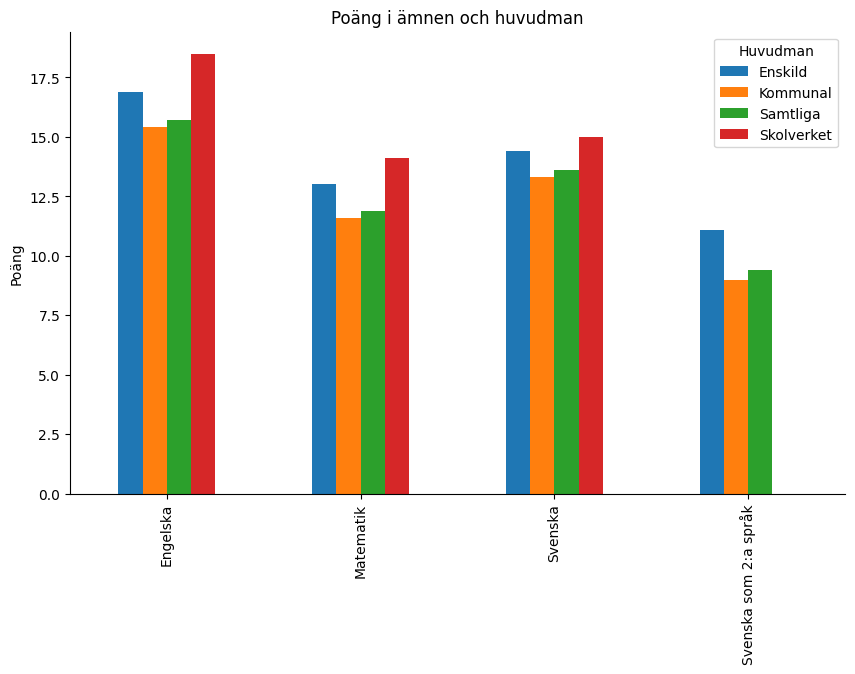

<Figure size 640x480 with 0 Axes>

In [88]:
# skapa en pivote tabell för att kunna skapa grupperingen
df_pivot = df_all_scores.pivot(index='Ämne', columns='Huvudman', values='Poäng')
ax = df_pivot.plot(kind='bar', stacked=False, figsize=(10, 6))

# lägg till etiketter och titel, legendtitel
plt.xlabel('')
plt.ylabel('Poäng')
plt.title('Poäng i ämnen och huvudman')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(title='Huvudman')
plt.show()

plt.savefig("images/poäng_ämnen_per_huvudman.png")

### d/e) Stapeldiagram för de olika ämnena

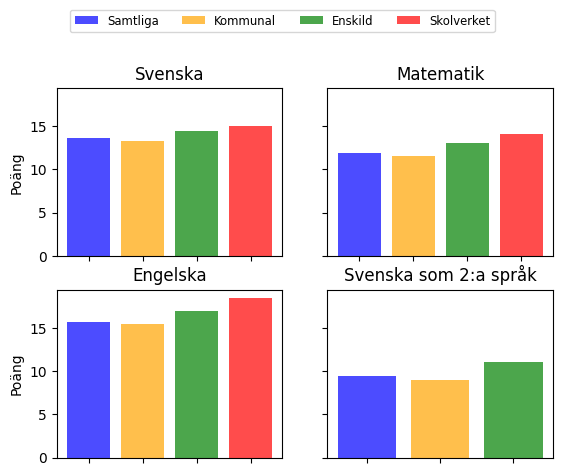

In [89]:
from matplotlib.lines import Line2D

# Skapa en plot bestående av 4st subplots (2x2)
fig, axes = plt.subplots(nrows=2, ncols=2, sharey='all', squeeze=True)

# Firsta subplot. I denna lägger vi till de färger som används för kategorierna (huvudman),
# här skapas också legend för hela ploten med definerade element för varje kategori
# Inspration hämtad från Stack Overflow

axes[0,0].bar(df_swed['Huvudman'], df_swed['Poäng'], color=['blue', 'orange', 'green', 'red'], alpha=0.7, label=df_swed['Huvudman'])
legend_elements = [Line2D([0], [0], color='blue', lw=10, label='Samtliga'),
                   Line2D([0], [0], color='orange', lw=10, label='Kommunal'),
                   Line2D([0], [0], color='green', lw=10, label='Enskild'),
                   Line2D([0], [0], color='red', lw=10, label='Skolverket')]

# lägg till en legend och sätt titel för y-axeln (för subplot [0,0] och [1,0])
# Add legend with defined elements set title an Y-axis (for subplot [0,0] and [1,0])
axes[0,0].legend(handles=legend_elements)
axes[0,0].set_title('Svenska')

# skapa titel på subplotar längs till vänster dvs [0,0] och [1,0]
axes[0,0].set_ylabel('Poäng')
axes[1,0].set_ylabel('Poäng')

# gör legenden horizontell istället för vertikal och flytta den till övre delen, ta bort x-axeln
# inspiration hämtad från Stack Overflow
axes[0,0].legend(loc='upper center', bbox_to_anchor=(1, 1.5), ncol=len(ax.patches)//2, fontsize='small')
axes[0,0].set_xticklabels([])

# Upprepa för de andra subplotarna; matematik, engelska och svenska som andra språk,
# dvs skapa en subplot utan legend, ta bort x-axel label och sätt titel
# Skulle kunna refaktoreras till en funktion genom "flatten" och intit på axes[1], 
axes[0,1].bar(df_math['Huvudman'], df_math['Poäng'], color=['blue', 'orange', 'green', 'red'], alpha=0.7)
axes[0,1].set_xticklabels([])
axes[0,1].set_title('Matematik')

axes[1,0].bar(df_eng['Huvudman'], df_eng['Poäng'], color=['blue', 'orange', 'green', 'red'], alpha=0.7)
axes[1,0].set_xticklabels([])
axes[1,0].set_title('Engelska')


axes[1,1].bar(df_sv2sp['Huvudman'], df_sv2sp['Poäng'], color=['blue', 'orange', 'green', 'red'], alpha=0.7)
axes[1,1].set_xticklabels([])
axes[1,1].set_title('Svenska som 2:a språk')

fig.savefig("images/subplot_ämnen_poäng_group_huvudman.png")

## 1. Uppvärmning betyg och examen 
- Data hämtat från filen betyg_o_prov_riksnivå.xlsx.
- använder Plotly för frafer och Panda för andra saker

### Läser in datafilen 

In [24]:
def read_data2(mysheetname,startrow, header):
    df_tmp=pd.read_excel("./Data/betyg_o_prov_riksnivå.xlsx", sheet_name=mysheetname, skiprows=startrow)
    df_tmp.columns=header
    # Cleaning "därav" rows
    df_tmp.drop(df_tmp[df_tmp['Läsår\nHuvudman\nBakgrund']=='därav'].index, inplace=True)
    # Cleaning Nan values rows with empty "Läsår/huvudman/Bakgrund" 
    df_tmp.drop(df_tmp[df_tmp['Läsår\nHuvudman\nBakgrund'].isnull()].index, inplace=True)
    
    return df_tmp
# Skapa dataframe headers
tabell1Bheader=['Läsår\nHuvudman\nBakgrund', 'Totalt (merit 16 ämnen)','Flickor (merit 16 ämnen)','Pojkar (merit 16 ämnen)','Totalt (merit 17 ämnen)','Flickor (merit 17 ämnen)','Pojkar (merit 17 ämnen)','Totalt (procent ej godkänt)','Flickor (procent ej godkänt)','Pojkar (procent ej godkänt)']
tabell1Aheader=['Läsår\nHuvudman\nBakgrund', 'Totalt (åk9)','Flickor (åk9)','Pojkar (åk9)','Totalt (slutbetyg)','Flickor (slutbetyg)','Pojkar (slutbetyg)','Totalt (godkända)','Flickor (godkända)','Pojkar (godkända)']

df_tabell1A=read_data2('Tabell 1A',6, tabell1Aheader)
# Rensa rader på NaN värden som inte fångats i funktionen
df_tabell1A.drop(df_tabell1A[df_tabell1A['Totalt (åk9)'].isnull()].index, inplace=True)


# Likande för tabell1B
df_tabell1B=read_data2('Tabell 1B',7, tabell1Bheader)
df_tabell1B.drop(df_tabell1B[df_tabell1B['Totalt (merit 16 ämnen)'].isnull()].index, inplace=True)




####  a) Skapa ett linjediagram med andelen studenter som underkänts i mer än ett ämne mellan 2018-23, inluderande totalt, flickor och pojkar.


Alternativ lösning I: Baserat på andelen (från Tabell 1A) 
$$(1 - \frac{N_{\text{studenter med godkännt}}}{N_{\text{Antal studenter}}})$$

In [29]:


def func_failed_fracT(row):
    z = (1.0-(row['Totalt (godkända)']/row['Totalt (åk9)']))*100
    return z

def func_failed_fracG(row):
    z = (1.0-(row['Flickor (godkända)']/row['Flickor (åk9)']))*100
    return z

def func_failed_fracB(row):
    z = (1.0-(row['Pojkar (godkända)']/row['Pojkar (åk9)']))*100
    return z

# Skapa en ny dataframe och använd "masking" för att få fram årtalens siffror
df_data=pd.DataFrame()
df_data = df_tabell1A[df_tabell1A['Läsår\nHuvudman\nBakgrund'].isin(['2018/19', '2019/20', '2020/21', '2021/22', '2022/23'])].copy()

# Döp om kolumnen så det blir snyggare och lägg till en ny column med procent underkända
# för de olika kategorierna
df_data.rename(columns={'Läsår\nHuvudman\nBakgrund':'Årtal'}, inplace = True)
df_data.insert(10,"Totalt (underkända)", df_data.apply(func_failed_fracT, axis=1), True)
df_data.insert(11,'Flickor (underkända)', df_data.apply(func_failed_fracG, axis=1), True)
df_data.insert(12,'Pojkar (underkända)', df_data.apply(func_failed_fracB, axis=1), True)

# Skapa grafen
fig = px.line(df_data, x='Årtal', y=['Totalt (underkända)', 'Flickor (underkända)', 'Pojkar (underkända)' ], 
               title="Procent av underkända studenter (i mer än ett ämne) mellan 2018-2023",
              labels={'Årtal': 'Läsår', 'value':'Procent', 'Totalt (underkända)':'Totalt %','Flickor (underkända)':'Flickor %','Pojkar (underkända)':'Pojkar %'},
              hover_data={'Årtal': True, 'value': ':.2f'})
            
# lägg till hovermode så man kan se siffrorna vid attention 
fig.update_layout(hovermode="x")
fig.update_xaxes(
    showspikes=True,
    spikedash="solid",
    spikecolor="green",
    spikemode="across",
    spikesnap="cursor"
)
# ta bort rubriken för legend
fig.update_legends(title='')


fig.show()



Alternativ lösning II: Använd andelen studenter som saknar godkänt i ett eller mer ämne (från tabell 1B)

In [91]:
f_data1b=pd.DataFrame()
# Skapa ny dataframe och plocka ut de rader som är relevanta
df_data1b = df_tabell1B[df_tabell1B['Läsår\nHuvudman\nBakgrund'].isin(['2018/19', '2019/20', '2020/21', '2021/22', '2022/23'])].copy()
# Snygga till dataframe med mer sägande namn
df_data1b.rename(columns={'Läsår\nHuvudman\nBakgrund':'Årtal'}, inplace = True)

fig = px.line(df_data1b, x='Årtal', y=['Totalt (procent ej godkänt)', 'Flickor (procent ej godkänt)', 'Pojkar (procent ej godkänt)' ], 
               title="Procent av studenterna som underkänts i ett eller fler ämnen 2018-2023",
              labels={'Årtal': 'Läsår', 'value':'Procent'},
              hover_data={'Årtal': True, 'value': ':.2f'})
            

fig.update_layout(hovermode="x")
fig.update_xaxes(
    showspikes=True,
    spikedash="solid",
    spikecolor="green",
    spikemode="across",
    spikesnap="cursor"
)

fig.update_legends(title='')


fig.show()

fig.write_html("images/procent_underkända_2018-2023.html")

#### b) Linjegraf för meritvärde för 16 ämnen (totalt, flickor och pojkar) 2018-2023



In [92]:
df_data2=pd.DataFrame()
df_data2 = df_tabell1B[df_tabell1B['Läsår\nHuvudman\nBakgrund'].isin(['2018/19', '2019/20', '2020/21', '2021/22', '2022/23'])].copy()
df_data2.rename(columns={'Läsår\nHuvudman\nBakgrund':'Årtal'}, inplace = True)

fig = px.line(df_data2, x='Årtal', y=['Totalt (merit 16 ämnen)', 'Flickor (merit 16 ämnen)', 'Pojkar (merit 16 ämnen)' ], 
               title="Meritvärde för studenter i 16 ämnen mellan 2018-2023", 
              labels={'Årtal': 'Läsår', 'value':'Merit poäng'},
              hover_data={'Årtal': True, 'value': ':.2f'})
            

fig.update_layout(hovermode="x")
fig.update_xaxes(
    showspikes=True,
    spikedash="solid",
    spikecolor="green",
    spikemode="across",
    spikesnap="cursor"
)

fig.update_layout(
    font_family="Courier New",
    font_color=GRAY1,
    title_font_family="Times New Roman",
    title_font_color=GRAY1,
    legend_title_font_color="black"
)
fig.update_xaxes(title_font_family="Arial")

fig.update_legends(title='')

fig.show()


fig.write_html("images/meritpoäng_16_ämnen_2018-2023.html")

#### c) Utforka andra variabler för att se hur meritvärde och andel med minst ett saknat betyg påverkas



Utforska bakgrunden hos studenter med avseende på hur stor del som saknar ett godkänt betyg
 

In [93]:
df_data3=pd.DataFrame()
df_data3 = df_tabell1B[df_tabell1B['Läsår\nHuvudman\nBakgrund'].isin(['Elever med svensk bakgrund','Födda i Sverige','Födda utomlands, inv. före 2014','Födda utomlands, inv. 2014 el. senare'])].copy()
df_data3.rename(columns={'Läsår\nHuvudman\nBakgrund':'Huvudman'}, inplace = True)


fig3 = px.bar(df_data3, x='Huvudman', y=['Totalt (procent ej godkänt)', 'Flickor (procent ej godkänt)', 'Pojkar (procent ej godkänt)' ], 
               title="Bakgrund hos studenter som underkänts i ett eller flera ämnen procent 2023",
               barmode='group',
              labels={'Huvudman': 'Bakgrund', 'value':'Procent','Elever med svensk bakgrund':'Svensk bakgrund','Totalt (underkända)':'Totalt %','Flickor (underkända)':'Flickor %','Pojkar (underkända)':'Pojkar %'},
              hover_data={'Huvudman': True, 'value': ':.1f'})

fig3.update_legends(title='')

fig3.show()

fig3.write_html("images/bakgrund_studenter_som_failar.html")

#### Meritvärde med avseende på bakgrund hos föräldrar/vårdnashavare


In [94]:
df_data4=pd.DataFrame()
df_data4 = df_tabell1B[df_tabell1B['Läsår\nHuvudman\nBakgrund'].isin(['Elever med svensk bakgrund','Födda i Sverige','Födda utomlands, inv. före 2014','Födda utomlands, inv. 2014 el. senare'])].copy()
df_data4.rename(columns={'Läsår\nHuvudman\nBakgrund':'Huvudman'}, inplace = True)

fig4 = px.bar(df_data4, x='Huvudman', y=['Totalt (merit 17 ämnen)', 'Flickor (merit 17 ämnen)', 'Pojkar (merit 17 ämnen)' ], 
               title="Meritvärde avseende beroende på bakgrund för studenter 2023",
               barmode='group',
              labels={'Huvudman': 'Studen kategori', 'value':'Meritpoäng', 'Elever med svensk bakgrund':'Svensk bakgrund','Totalt (merit 17 ämnen)':'Totalt','Flickor (underkända)':'Flickor %','Pojkar (underkända)':'Pojkar %'},
              
              hover_data={'Huvudman': True, 'value': ':.f'})
fig4.update_legends(title='')

fig4.show()
fig4.write_html("images/meritpoäng_föräldrar_bakgrund.html")


In [45]:
df_data5=pd.DataFrame()
df_data5 = df_tabell1B[df_tabell1B['Läsår\nHuvudman\nBakgrund'].isin(['Förgymnasial utbildning','Gymnasial utbildning','Kort utbildning','Lång utbildning'])].copy()
df_data5.rename(columns={'Läsår\nHuvudman\nBakgrund':'Föräldrars bakgrund'}, inplace = True)

fig5 = px.bar(df_data5, x='Föräldrars bakgrund', y=['Totalt (merit 17 ämnen)', 'Flickor (merit 17 ämnen)', 'Pojkar (merit 17 ämnen)' ], 
               title="Meritvärdets beroende av föräldrars utbildningsnivå för studenter 2023",
               barmode='group',
              labels={'Huvudman': 'Studen category', 'value':'Merit points'},
              
              hover_data={'Föräldrars bakgrund': True, 'value': ':.2f'})
fig5.update_xaxes(labelalias={'Kort utbildning':'upp till 3års eftergymnasial', 'Lång utbildning':'minst 3års eftergymnasial'})
fig5.show()


## Uppgift 2 - KPIer & EDA


### KPI 1 Kostnader i kommunala skolor i förhållande till antalet elever

Skolor har olika kostnader per elev. Förväntningen är att kommuner som lägger mycket per elev resulterar i höga betyg och en hög andel som tar examen. 

I den explorativa dataanalysen så används statistik från skolverket, Gymnasieskolan - kostnader per kommun och Gymnasieskolan - avgångselever 
- Gymnasieskola - Avgångselever, nationella program (fr.o.m. 2013_14) 2023 Kommun, - kommentar läsår 22/23
- Gymnasieskola - Kostnader per kommun 2022 Kommun

I det initiala steget läses data in, rensas och sammanställs data, en graf presenteras över kostnadsbilden per student för top 10 respektive 10 lägsta kommunerna. 

In [95]:
# funktion för a rensa Kostnads data

def polish_df(df_mydata, col):
    df_mydata=df_mydata[df_mydata[col]!='.']
    df_mydata=df_mydata[False == df_mydata[col].isnull()]
    return df_mydata

#funktion för att läsa  och rensa utbildnings data

def read_data3(mysheetname):
    df_tmp=pd.read_excel("./Data/Gymnasieskola - Avgångselever, nationella program (fr.o.m. 2013_14) 2023 Kommun.xlsx", sheet_name=mysheetname, skiprows=8)
    df_tmp=df_tmp[df_tmp['Typ av huvudman']=='Kommunal']
    #df_tmp=df_tmp[df_tmp['Kommun'].isin(selectedlist)]
    df_tmp=df_tmp[df_tmp['Andel (%) med examen']!='.']
    df_tmp=df_tmp[df_tmp['Andel (%) med examen']!='..']
    df_tmp=df_tmp[False == df_tmp['Andel (%) med examen'].isnull()]
    df_tmp['Andel (%) med examen']=df_tmp['Andel (%) med examen'].astype(float)
    df_tmp['GBP för elever med examen']=df_tmp['GBP för elever med examen'].astype(float)
    df_tmp=df_tmp.sort_values('Andel (%) med examen')
    
    return df_tmp

# funktion för att läsa in kostnadsdata

def read_data(mysheetname):
    df_tmp=pd.read_excel("./Data/Gymnasieskola - Kostnader per kommun 2022 Kommun.xlsx", sheet_name=mysheetname, skiprows=7)

    return df_tmp

# Läs in data för hur olika kommuner "lyckas" med att utbilda 

df_nationella=read_data3('Nationella program')
df_högskf=read_data3('Högskoleförberedande program')
df_yrkes=read_data3('Yrkesprogram')

# Läs in hur mycket pengar olika kommuner lägger på utbildning
df_kostnader=read_data("Sheet1")

cost_numerics=['Genomsnittligt elevantal','Totalt','Undervisning','Totalt per elev','Undervisning per elev','Lokaler per elev','Måltider per elev','Lärverktyg per elev','Elevhälsa per elev','Övrigt per elev']
interesting_cols=['Genomsnittligt elevantal','Totalt per elev','Undervisning per elev', 'Måltider per elev','Lärverktyg per elev','Elevhälsa per elev','Övrigt per elev']
for item in interesting_cols:
    df_kostnader=polish_df(df_kostnader,item)


df_kostnader[cost_numerics]=df_kostnader[cost_numerics].astype(int)

# Filtrera bort små kommuner och andra utbildare (landsting), filtrera bort de som har negativa kostnade = intäkter
df_kostnader=df_kostnader[df_kostnader['Genomsnittligt elevantal']>20]
df_kostnader=df_kostnader[df_kostnader['Måltider per elev']>0]
df_kostnader=df_kostnader[False == df_kostnader['Läns-kod'].isnull()]

#df_kostnader=df_kostnader[df_kostnader['Kommun'].isin(selectednat)]

#df_kostnader=df_kostnader.sort_values('Totalt per elev')

# Slå ihop data genom merge på kommun
df_nat_kost=pd.merge(df_nationella, df_kostnader, on='Kommun', how="inner")
df_högskf_kost=pd.merge(df_högskf, df_kostnader, on='Kommun', how="inner")
df_yrkes_kost=pd.merge(df_yrkes, df_kostnader, on='Kommun', how="inner")
#df_nat_sort=df_nat_kost.sort_values('GBP för elever med examen')

df_kostnader=df_kostnader.sort_values('Totalt per elev')
df_low10=df_kostnader[-10:]
df_top10=df_kostnader[:10]
selectedlist=list(df_top10['Kommun'])+list(df_low10['Kommun'])
df_selected=df_kostnader[df_kostnader['Kommun'].isin(selectedlist)]
df_selected=df_selected.sort_values('Totalt per elev')

fig6 = px.bar(df_selected, y='Kommun', x=['Totalt per elev','Undervisning per elev','Måltider per elev','Lärverktyg per elev'], 
               title="De 10 lägsta kommunerna  respektive 10 högsta \nkommunerna för kostnaderna per student",
                barmode='group',
              labels={'Kommun': 'Kommun', 'value':'kr per elev'},
              #color = color,
              hover_data={'Kommun': True, 'value': ':5.0f kr'},
              category_orders={'Kommun':selectedlist},
              width=800, height=800)
fig6.update_layout()
fig6.update_legends(title='')


fig6.update_layout(
    font_family="Courier New",
    font_color=GRAY1,
    title_font_family="Times New Roman",
    title_font_color=GRAY1,
    legend_title_font_color="black"
)
fig6.update_xaxes(title_font_family="Arial")

fig6.update_legends(title='')

fig6.show()

fig6.write_html("images/de_10_högsta_vs_lägsta_kommunkostnaderna.html")

Utforska om det är så att nationella program har högre andel som tar exen för de som har hög kostnad undervisning per elev...

In [96]:
df_nat_kost_sel=df_nat_kost[df_nat_kost['Kommun'].isin(selectedlist)]
df_yrkes_kost_sel=df_yrkes_kost[df_yrkes_kost['Kommun'].isin(selectedlist)]
df_högskf_kost_sel=df_högskf_kost[df_högskf_kost['Kommun'].isin(selectedlist)]

# ändra värden till kkr per student, skapar varnibgar men ok....
df_nat_kost_sel['Undervisning per elev']=df_nat_kost_sel['Undervisning per elev']/1000
df_högskf_kost_sel['Undervisning per elev']=df_högskf_kost_sel['Undervisning per elev']/1000
df_yrkes_kost_sel['Undervisning per elev']=df_yrkes_kost_sel['Undervisning per elev']/1000

fig7 = px.bar(df_nat_kost_sel, y='Kommun', x=['Undervisning per elev','Andel (%) med examen'], 
               title="De 10 lägsta/lägsta kommunkostnaderna per student - nationella program",
                barmode='group',
              labels={'Kommun': 'Kommun', 'value':'Totalt per elev'},
              #color = color,
              hover_data={'Kommun': True, 'value': ':5.1f'},
              category_orders={'Kommun':selectedlist})
fig7.update_layout()
fig7.update_legends(title='')
fig7.update_layout(
    font_family="Courier New",
    font_color=GRAY1,
    title_font_family="Times New Roman",
    title_font_color=GRAY1,
    legend_title_font_color="black"
)
fig7.update_xaxes(title_font_family="Arial")

fig7.show()


fig7.write_html("images/nationella_prog_kostnad_vs_resultat.html")



C:\Users\Lund\AppData\Local\Temp\ipykernel_46652\2698646207.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lund\AppData\Local\Temp\ipykernel_46652\2698646207.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lund\AppData\Local\Temp\ipykernel_46652\2698646207.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [81]:
fig8 = px.bar(df_högskf_kost_sel, y='Kommun', x=['Undervisning per elev','Andel (%) med examen'], 
               title="De 10 lägsta/lägsta kommunkostnaderna per student -högskoleförberedande",
                barmode='group',
              labels={'Kommun': 'Kommun', 'value':'Totalt per elev'},
              #color = color,
              hover_data={'Kommun': True, 'value': ':5.1f'},
              category_orders={'Kommun':selectedlist})
fig8.update_layout()
fig8.update_legends(title='')
fig8.update_layout(
    font_family="Courier New",
    font_color=GRAY1,
    title_font_family="Times New Roman",
    title_font_color=GRAY1,
    legend_title_font_color="black"
)
fig8.update_xaxes(title_font_family="Arial")

fig8.show()

In [84]:
fig9 = px.bar(df_yrkes_kost_sel, y='Kommun', x=['Undervisning per elev','Andel (%) med examen'], 
               title="De 10 lägsta/lägsta kommunkostnaderna per student -högskoleförberedande",
                barmode='group',
              labels={'Kommun': 'Kommun', 'value':'Totalt per elev'},
              #color = color,
              hover_data={'Kommun': True, 'value': ':5.1f'},
              category_orders={'Kommun':selectedlist})
fig9.update_layout()
fig9.update_legends(title='')
fig9.update_layout(
    font_family="Courier New",
    font_color=GRAY1,
    title_font_family="Times New Roman",
    title_font_color=GRAY1,
    legend_title_font_color="black"
)
fig9.update_xaxes(title_font_family="Arial")

fig9.show()


In [130]:
print(df_nat_kost['Undervisning per elev'].corr(df_nat_kost['Ma 1']))

0.08542242032250628
